# Manipulação de séries temporais com Pandas

Notebook feito por [Julia Pocciotti](https://github.com/juliapocciotti)

### O que é uma série temporal?
![](https://derrickmartins.files.wordpress.com/2015/11/time-series-analysis.png)

Uma série temporal pode ser definida como um conjunto de observações ordenadas no tempo, como, por exemplo, os valores mensais de temperatura registrados na cidade de São Paulo, acidentes ocorridos nas rodovias de uma cidade durante um mês, e claro, o preço de ações em um determinado período de tempo.

Neste notebook, vamos introduzir os principais conceitos relacionados ao tópico de análise em séries temporais. Aqui vamos abordar como manipulá-las utilizando Pandas. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set()

## 0. Python `strftime()`
Antes de tudo, vamos entender como converter datas, horários e objetos datetime nos seus formatos equivalentes de strings usando `strftime()`

In [2]:
from datetime import datetime

now = datetime.now() # horário e data atual 
print(now)

2021-03-09 13:07:12.398225


**Como que o `strftime` funciona?**
- %Y : ano
- %m : mês 
- %d : dia 
- %H : hora
- %M : minuto
- %S : segundo

In [3]:
year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

year: 2021
month: 03
day: 09
time: 13:07:12
date and time: 03/09/2021, 13:07:12


In [4]:
type(date_time)

str

In [5]:
type(now)

datetime.datetime

## 1. Datas e horários no Pandas

### 1.1. Conceitos básicos
 Nessa biblioteca, uma combinação de objetos nativos do python são utilizadas, como o `datetime` e `dateutil`, além do `numpy.datetime64`. Com essas ferramentas, o Pandas nos fornece um tipo de objeto chamado `Timestamp`, que representa um único ponto no tempo. É através do agrupamento de vários desses objetos `Timestamp` que é construído um `DatetimeIndex`. Usando ele, podemos indexar datas em um panda Series ou DataFrame. 

Vamos ver alguns exemplos: 

In [6]:
date = pd.to_datetime("18th of November, 2000")
date

Timestamp('2000-11-18 00:00:00')

Uma das maiores utilidades em usar Pandas para séries temporais é para indexar datas usando timestamps.

Para isso, podemos construir um panda Series com os dados indexados pelo timestamp:

In [7]:
index = pd.DatetimeIndex(['2013-11-18', '2014-11-18',
                          '2015-11-18', '2016-11-18'])
data = pd.Series([0, 10, 20, 30], index=index)
data

2013-11-18     0
2014-11-18    10
2015-11-18    20
2016-11-18    30
dtype: int64

In [8]:
data['2013':'2015']

2013-11-18     0
2014-11-18    10
2015-11-18    20
dtype: int64

In [9]:
data['2016']

2016-11-18    30
dtype: int64

Como vimos, os objetos fundamentais para trabalhar com séries temporais no pandas são `Timestamp` e `DatetimeIndex`. Além de trabalhar com essas classes diretamente, é mais comum utilizar a função `pd.to_datetime()`. Vamos ver isso mais em detalhes agora.

### 1.2. `date_range` e `to_datetime`
`date_range` é um método que retorna uma frequência fixa de DatetimeIndex. Ele pode ser muito útil quando queremos criar nossa própria série temporal, basta passarmos uma data de início e outra de término, e, se necessário, podemos especificar também a frequência na qual queremos esses dados. Vamos ver alguns exemplos:

In [10]:
# Criando datetimeindex com frequência diária 
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Criando datetimeindex com frequência mensal  
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

Além dos exemplos que já vimos, `pandas.to_datetime()` pode ser usado para converter um DataFrame para uma série datetime:

In [12]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [13]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

## 2. Trabalhando com os dados

### 2.1. Importando os dados

Temos várias formas diferentes para importar preços históricos de ações. Aqui, vamos utilizar o pandas-datareader:

In [14]:
from pandas_datareader import data

goog = data.DataReader('GOOG', 
                       start='2004', 
                       end='2020',
                       data_source='yahoo')
goog.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


### 2.2. Visualizando o dataset

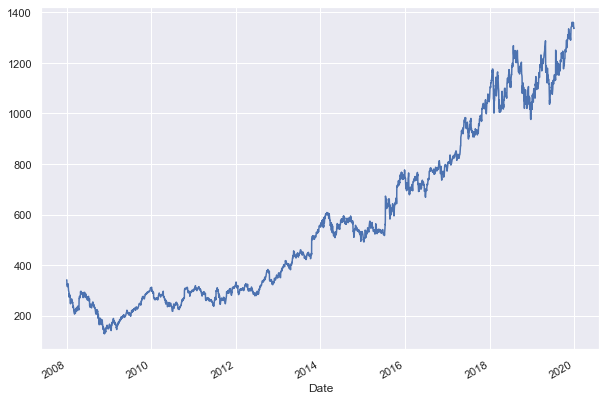

In [15]:
goog['2008':'2020']['Close'].plot(figsize=(10,7));

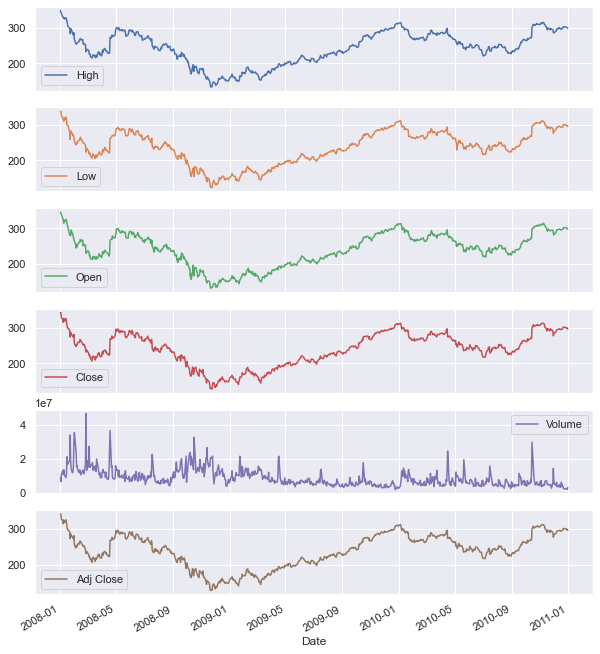

In [16]:
goog['2008':'2010'].plot(subplots=True, figsize=(10,12))
#plt.savefig('stocks.png')
plt.show();

## 3. Resampling, Shifting, e Windowing

### 3.1. Resampling (Reamostragem)
Uma necessidade comum em séries temporais é reamostrar os dados em uma frequência maior ou menor. De maneira geral, existem duas formas principais de reamostragem:
- Upsampling: Séries temporais são reamostradas de uma frequência baixa para uma frequência alta (ex: mensal para diária)
- Downsampling: Séries temporais são reamostradas de uma frequência alta para uma frequência baixa (ex: semanal para mensal)
Essas duas técnicas podem ser utilizadas em situações nas quais os nossos dados não estão disponíveis na mesma frequência em que queremos as nossas predições. Além disso, a reamostragem pode ser utilizada como um instrumento para feature engineering, pois podemos alterar a frequência dos dados para prover insights em um problema de aprendizado supervisionado, por exemplo.

Com o Pandas, isso pode ser feito utilizando o método `resample()` ou `asfreq()`. A diferença principal entre esses dois é que o resample() acaba sendo utilizado como ferrementa de *data aggregation* , enquanto asfreq() é fundamentalmente utilizado para *data selection*. 

Vamos pegar os preços de fechamento do Google e comparar o retorno dos dois métodos com a reamostragem dos dados no final do ano:

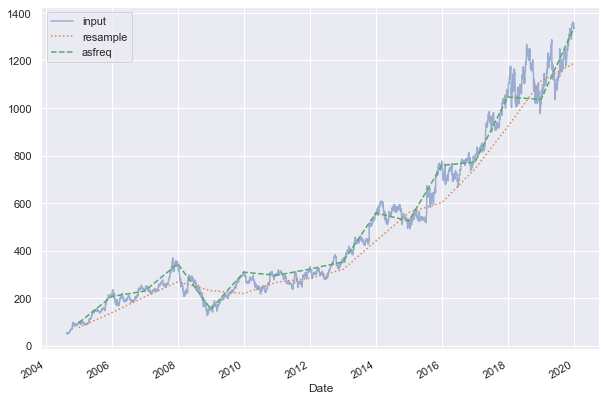

In [17]:
goog['Close'].plot(alpha=0.5, style='-', figsize=(10,7))
goog['Close'].resample('BA').mean().plot(style=':') # BA - Business year end
goog['Close'].asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Podemos ver a diferença entre os dois com esse gráfico. Em cada ponto, resample reporta a média do ano anterior, enquanto o asfreq reporta o valor no final do ano.


***Offsets**

No código acima usamos a string 'BA' como parâmetro dos dois métodos de reamostragem. Além desse, o Pandas oferece uma série de abreviações para diferentes tipos de frequências (ou offsets), você pode conferir todos na documentação da biblioteca clicando [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

Vamos ver alguns outros exemplos:


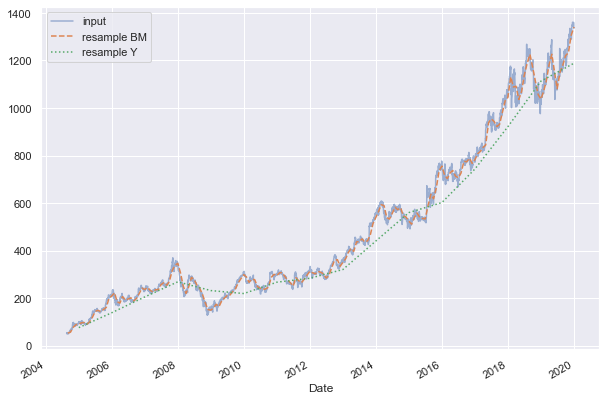

In [18]:
goog['Close'].plot(alpha=0.5, style='-', figsize=(10,7))
goog['Close'].resample('BM').mean().plot(style='--');# business month end
goog['Close'].resample('Y').mean().plot(style=':'); # year end frequency
plt.legend(['input', 'resample BM', 'resample Y'],
           loc='upper left'); 

### 3.2. Shifting
Outra operação comum é mudar os dados no tempo. Pandas possui dois métodos para isso também: `shift()` e `tshift()`. A diferença principal é que o tshift altera apenas o index, enquando o shift faz isso para os dados. 


In [19]:
goog = goog['Close']

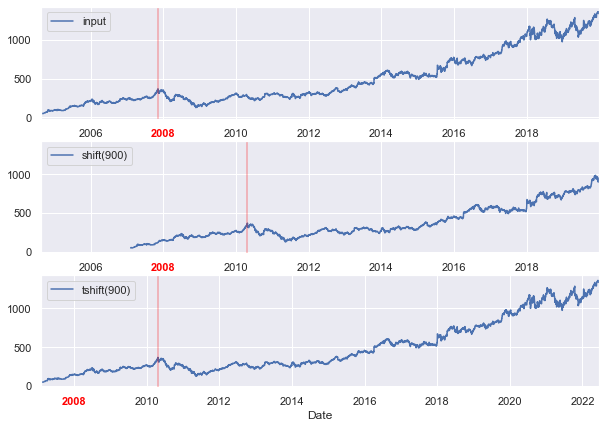

In [20]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10,7))

# aplicando a frequência para os dados 
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legendas e anotações
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

### 3.3. Windows 
Usamos o método `rolling()` de objetos do tipo Series e DataFrames, que retornam uma view similar a que usamos em um tipo de operação groupby. 

Vamos utilizar como exemplo uma rolling view com média e desvio padrão centrada nos preços das ações do Google:

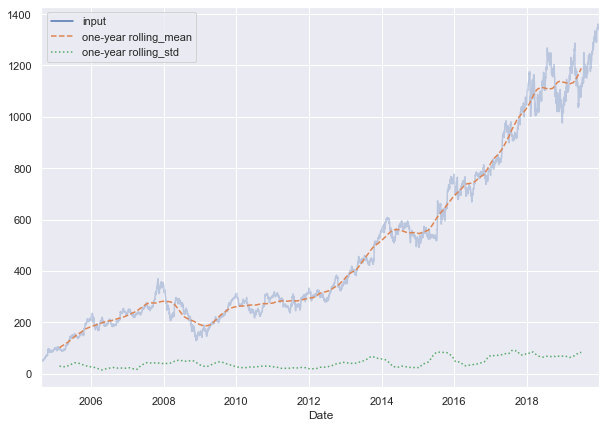

In [21]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(10,7))
ax.lines[0].set_alpha(0.3)

## 4. Retornos 
### 4.1. Retorno simples

Para calcular o retorno simples, utilizamos o método `pct_change()` do pandas:

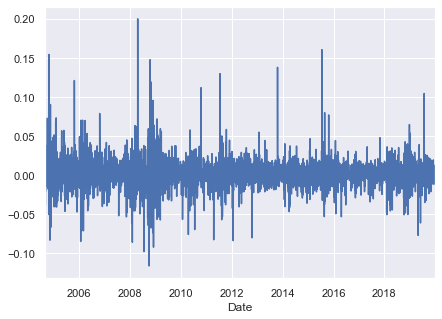

In [23]:
goog.pct_change().plot(figsize=(7, 5));

### 4.2. Retorno logarítmico 

In [24]:
def log_return(col):
    return np.log(col) - np.log(col.shift(1))

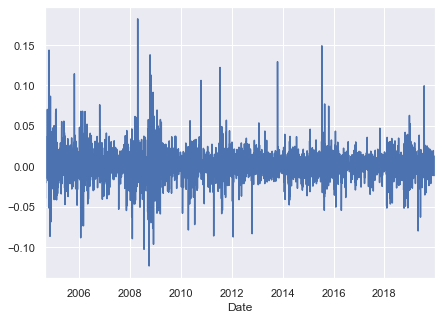

In [25]:
log_return(goog).plot(figsize=(7,5));

 ## *Bônus - `turingquant`!*
Você sabia que essas ferramentas também estão disponíveis na biblioteca do [turingquant](https://pypi.org/project/turingquant/)? 

A documentação pode ser encontrada [aqui](https://turingquant.readthedocs.io/pt/latest/)

Antes de qualquer coisa, podemos instalar a biblioteca facilmente utilizando o pip:

In [26]:
#!pip install turingquant

Para calcular os retornos, vamos utilizar o módulo metrics da biblioteca:

In [27]:
from turingquant.metrics import returns

In [33]:
?returns

In [34]:
# Retorno simples 
returns(goog, return_type='simp')

Date
2004-08-19         NaN
2004-08-20    0.079430
2004-08-21    0.000000
2004-08-22    0.000000
2004-08-23    0.010064
                ...   
2019-12-27   -0.006256
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30   -0.011650
2019-12-31    0.000659
Freq: D, Name: Close, Length: 5613, dtype: float64

In [37]:
# Retorno logarítmico
returns(goog, return_type='log')

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-21    0.000000
2004-08-22    0.000000
2004-08-23    0.010013
                ...   
2019-12-27   -0.006275
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30   -0.011719
2019-12-31    0.000658
Freq: D, Name: Close, Length: 5613, dtype: float64

## Referências:
Publicação no Medium: https://medium.com/turing-talks/manipulação-de-séries-temporais-com-pandas-db4ee39a0c1b 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series